# 本章摘要

**计算机视觉的不同分支**，包括：
- 图像分类
- 图像分割
- 目标检测 <p>

**现代卷积神经网络的架构模式**，包括：
- 残差连接
- 批量规范化
- 深度可分离卷积对卷积神经网络所学内容进行可视化和解释的方法 <p>

# 三项基本的计算机视觉任务

## 图像分类(image classification)

**图像分类**：的目的是为图像指定一个或多个标签。

## 图像分割(image segmentation)

**图像分割**：的目的是将图像“分割”或“划分”成不同的区域，每个区域通常对应一个类别。

## 目标检测(object detection)

**目标检测**：的目的是在图像中感兴趣的目标周围绘制矩形（称为**边界框**），并给出每个矩形对应的类别

![三项基本的计算机视觉任务](images/三项基本的计算机视觉任务.png)

## 其他计算机视觉任务

计算机视觉深度学习还包括一些更小众的任务，比如图像相似度评分、关键点检测（精确定位图像中感兴趣的属性，如面部特征）、姿态估计、三维网络估计等。

# 图像分割示例

用深度学习进行图像分割，是指利用模型为图像中的每个像素指定一个类别，从而将**图像分割**成不用的区域（比如：“背景”和“前景”，或者“道路”“汽车”和“人行道”）。这种通用技术可用于驱动大量有价值的应用，比如：图像编辑、视频剪辑、自动驾驶、机器人、医学成像等。 <p>

## 两种图像分割

### 语义分割

**语义分割**（semantic segmentation）：分别将每个像素划分到一个语义类别，比如“猫”。如果图像中有两只猫，那么对应的像素都会被映射到同一个“猫”类别中。

### 实例分割

**实例分割**（instance segmentation）：不仅按类别对图像像素进行分类，还要解析出单个对象实例。对于包含两只猫的图像，实例分割将“猫1”和“猫2”作为两个独立的像素类别。<p>

![语义分割与实例分割](images/语义分割与实例分割.png)

## 语义分割示例

使用Oxford-IIIT宠物数据集，其中包含7390张不同品种的猫狗图片，以及每张图片的前景-背景分割掩码。 <p>

**分割掩码**（segmentation mask）相当于图像分割任务的标签：它是与输入图像大小相同的图像，具有单一颜色通道，其中每个整数值对应输入图像中相应像素的类别。本例中，分割掩码的像素值可以取以下三者之一：
1. (表示前景)
2. (表示背景)
3. (表示轮廓)

### 下载Oxford-IIIT数据集

In [1]:
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz

--2024-09-16 13:53:36--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
正在解析主机 www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
正在连接 www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 301 Moved Permanently
位置：https://thor.robots.ox.ac.uk/pets/images.tar.gz [跟随至新的 URL]
--2024-09-16 13:53:38--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
正在解析主机 thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
正在连接 thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：791918971 (755M) [application/octet-stream]
正在保存至: “images.tar.gz”

images.tar.gz       100%[===================>] 755.23M  19.3MB/s  用时 43s       

2024-09-16 13:54:22 (17.5 MB/s) - 已保存 “images.tar.gz” [791918971/791918971])



In [5]:
!mv images.tar.gz ./data

In [6]:
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

--2024-09-16 13:56:01--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
正在解析主机 www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
正在连接 www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 301 Moved Permanently
位置：https://thor.robots.ox.ac.uk/pets/annotations.tar.gz [跟随至新的 URL]
--2024-09-16 13:56:02--  https://thor.robots.ox.ac.uk/pets/annotations.tar.gz
正在解析主机 thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
正在连接 thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：19173078 (18M) [application/octet-stream]
正在保存至: “annotations.tar.gz”

annotations.tar.gz  100%[===================>]  18.28M  7.95MB/s  用时 2.3s      

2024-09-16 13:56:06 (7.95 MB/s) - 已保存 “annotations.tar.gz” [19173078/19173078])



In [7]:
!mv annotations.tar.gz ./data

! tar -xf ./data/images.tar.gz -C ./data/

In [15]:
! tar -xf ./data/annotations.tar.gz -C ./data/

### 数据预处理（准备输入数据）

#### 准备输入文件路径以及对应的掩码文件路径

In [3]:
import os

input_dir = "./data/images/"
target_dir = "./data/annotations/trimaps/"
input_img_paths = sorted([os.path.join(input_dir, fname) 
                          for fname in os.listdir(input_dir)
                          if fname.endswith(".jpg")])
target_paths = sorted([os.path.join(target_dir, fname) 
                       for fname in os.listdir(target_dir)
                       if fname.endswith(".png") and not fname.startswith(".")])

#### 输入及其掩码样式

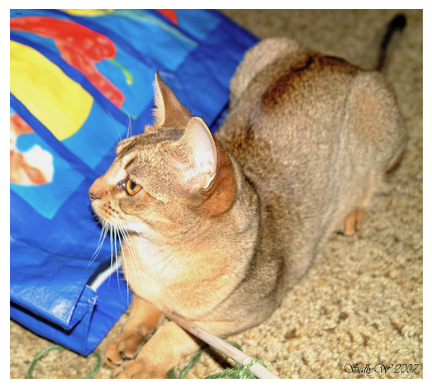

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

plt.axis("off")
plt.imshow(load_img(input_img_paths[9]))

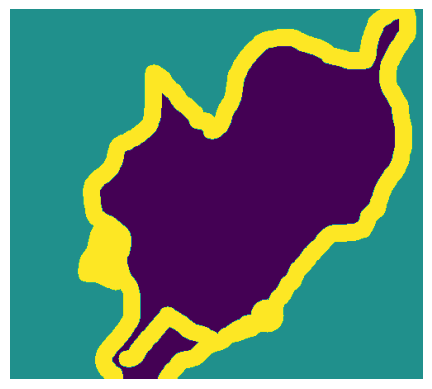

In [5]:
# 对应的目标掩码
def display_target(target_array):
    normalized_array = (target_array.astype("uint8") - 1) * 127
    plt.axis("off")
    plt.imshow(normalized_array[:, :, 0])

# 设置color_mode="grayscale"，这样加载的图像将被视为具有单一颜色通道
img = img_to_array(load_img(target_paths[9], color_mode="grayscale"))
display_target(img)

#### 划分训练接和验证集

In [6]:
import numpy as np
import random

# 将所有图像的尺寸都调整为200 x 200
img_size = (200, 200)
# 数据集中的样本总数
num_imgs = len(input_img_paths)
# 将文件路径打乱
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_paths)

def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))

def path_to_target(path):
    img = img_to_array(load_img(path, target_size=img_size, color_mode="grayscale"))
    img = img.astype('uint8') - 1
    return img

input_imgs = np.zeros((num_imgs, ) + img_size + (3, ), dtype="float32")
targets = np.zeros((num_imgs, ) + img_size + (1, ), dtype='uint8')

for i in range(num_imgs):
    input_imgs[i] = path_to_input_image(input_img_paths[i])
    targets[i] = path_to_target(target_paths[i])

num_val_samples = 1000
# 分割出训练集
train_input_imgs = input_imgs[: -num_val_samples]
train_targets = targets[: -num_val_samples]
# 分割出验证集
val_input_imgs = input_imgs[-num_val_samples:]
val_targets = targets[-num_val_samples:]

### 定义图像分割模型

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3, ))
    x = layers.Rescaling(1. / 255)(inputs)
    
    x = layers.Conv2D(64, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)

    x = layers.Conv2D(128, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)

    x = layers.Conv2D(256, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)

    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(256, 3, strides=2, activation="relu", padding="same")(x)

    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(128, 3, strides=2, activation="relu", padding="same")(x)

    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(64, 3, strides=2, activation="relu", padding="same")(x)

    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    model = keras.Model(inputs, outputs)
    return model

model = get_model(img_size=img_size, num_classes=3)
model.summary()

2024-09-25 12:19:13.362672: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-09-25 12:19:13.362725: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-25 12:19:13.362733: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-25 12:19:13.363031: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-25 12:19:13.363057: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 25, 25, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 50, 50, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 50, 50, 128)    │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 100, 100, 128)  │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 100, 100, 64)   │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 200, 200, 64)   │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 200, 200, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,880,643 (10.99 MB)

 Trainable params: 2,880,643 (10.99 MB)

 Non-trainable params: 0 (0.00 B)

**模型定义解析：** <p>
模型前半部分与用于图像分类的卷积神经网络非常相似，二者都是多个Conv2D层的堆叠，滤波器的数量逐渐增加。我们对图像进行3次2倍下采样，最终激活尺寸为(25, 25, 256)。前半部分的目的是将图像编码为较小的特征图，其中每个空间位置（或像素）都包含原始图像中较大空间的信息。是一种**压缩**操作。 <p>

前半部分与之前的分类模型有一个重要区别，那就是下采样的方法不同：使用MaxPooling2D层来对特征图进行采样；本例的采样方法是每隔一个卷积层使用**步幅**。**原因：** 对于图像分割，我们关注信息的**空间位置**，因为需要生成每个像素的目标掩码作为模型输出。对于MaxPooling2D层（2x2最大汇聚），它完全破坏了每个汇聚窗口中的位置信息：对每个窗口返回一个标量值，却完全不知道这个值来自窗口中4个位置中的哪一个。因此，虽然最大汇聚层在分类任务中表现很好，但在分割任务中会对性能造成很大影响。与此相对，步进卷积可以很好的对特征图进行下采样，同时保留位置信息。 <p>

模型的后半部分是多个Conv2DTranspose层的堆叠。**Conv2DTranspose层作用：** 模型前半部分的输出是形状为(25, 25, 256)的特征图，但我们希望最终输出与目标掩码具有相同的形状，即(200, 200, 3)。因此，我们需要使用之前变换的**逆变换**，对特征图进行**上采样**（upsample）而不是下采样。这就是Conv2DTranspose层的作用。

### 编译和拟合模型

In [6]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="rmsprop")

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="oxford_sementation.keras",
        save_best_only=True
    )
]

history = model.fit(
    train_input_imgs,
    train_targets,
    epochs=50,
    callbacks=callbacks,
    batch_size=64,
    validation_data=(val_input_imgs, val_targets))

Epoch 1/50


2024-09-25 09:56:13.949029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


100/100 ━━━━━━━━━━━━━━━━━━━━ 95s 939ms/step - loss: 0.9751 - val_loss: 0.9108
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 932ms/step - loss: 0.9059 - val_loss: 0.8796
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 932ms/step - loss: 0.8569 - val_loss: 0.9250
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 934ms/step - loss: 0.8303 - val_loss: 0.7701
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 931ms/step - loss: 0.7915 - val_loss: 0.7363
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 97s 973ms/step - loss: 0.7632 - val_loss: 0.7351
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 936ms/step - loss: 0.7497 - val_loss: 0.8014
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 931ms/step - loss: 0.7438 - val_loss: 0.6923
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 937ms/step - loss: 0.7227 - val_loss: 0.8283
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 935ms/step - loss: 0.6904 - val_loss: 0.6383
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 936ms/step - loss: 0.6474 - val_loss: 0.5879
Epoch 12/50
100/100 ━━━━━━━━━━

### 绘制损失曲线

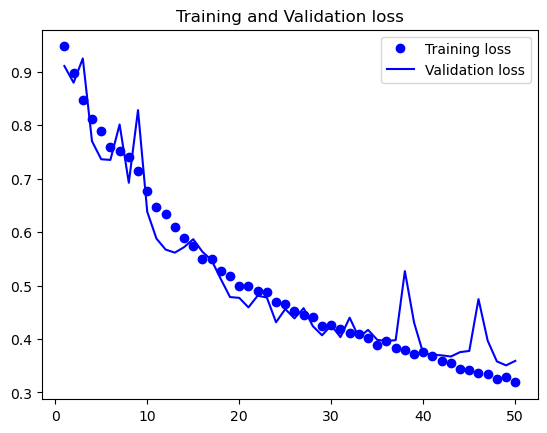

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()

### 预测分割掩码

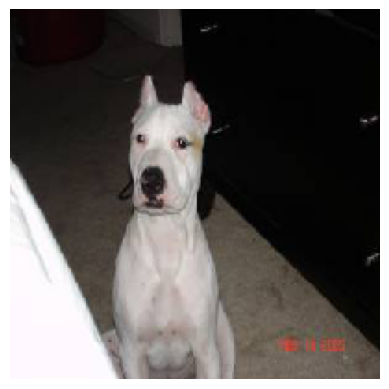

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


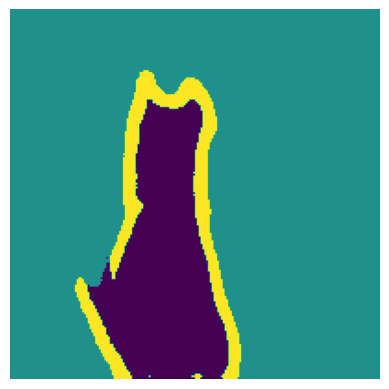

In [12]:
from tensorflow.keras.utils import array_to_img

model = keras.models.load_model("oxford_sementation.keras")
i = 4
test_image = val_input_imgs[i]
plt.axis("off")
plt.imshow(array_to_img(test_image))
plt.show()
mask = model.predict(np.expand_dims(test_image, 0))[0]

# 展示模型的预测结果
def display_mask(pred):
    mask = np.argmax(pred, axis=-1)
    mask *= 127
    plt.axis("off")
    plt.imshow(mask)

display_mask(mask)

# 现代卷积神经网络架构模式

**模型的“架构”是什么？** 在创建模型的过程中做出的所有选择：使用哪些层、如何配置这些层，以及如何连接这些层。 这些选择定义了模型的**假设空间**，即梯度下降可以搜索的函数空间，其参数为模型权重。 <p>

**良好的模型架构具有哪些优点？** 
- 加速学习过程，让模型有效利用训练数据，降低对大型数据集的需求；
- 减小搜索空间，或者更容易收敛到搜索空间的良好为止。 <p>

**模型建构的目的？** 为了能够利用梯度下降**更轻松的解决问题**。 <p>

**基本的卷积神经网络架构**
- **残差连接(residual connection)**
- **批量规范化(batch normalization)**
- **可分离卷积(separable convolution)**

## 模块化、层次结构和复用

**让复杂系统变简单的通用方法：** 将无定形的复杂内容构建为**模块** ，将模块组织成**层次结构** ，并多次**复用**相同的模块。这就是**MHR**方法。 <p>

**深度学习应用MHR方法：** 通过梯度下降进行连续优化，选择一种经典的优化方法（在连续函数空间中的梯度下降），将搜索空间划分为模块（层），并复用所有可复用的内容（例如：卷积就是在不同的空间位置复用相同的信息）。这些模块组成了一个深度的层次结构。 <p>

## 残差连接

假设有一个函数链：<br>
`y=f4(f3(f2(f1(x))))` <p>

**目标：** 根据f4的输出（模型损失）记录的误差来调节链中每个函数的参数。想要调节f1，需要通过f2、f3和f4来传递误差信息。然而链中的每个函数都会引入一些噪声。如果函数链太长，那么这些噪声会盖过梯度信息，反向传播就会停止工作，模型也就根本无法训练。这就是**梯度消失(vanishing gradient)** 问题。 <p>

**解决方式：** 强制要求链中的每个函数都是无损的，即能够保留前一个输入中所包含的信息（不含噪声）。实现最简单的方法是使用**残差连接**。<br>
**残差连接具体实现：** 将一层或一个层块的输入添加到它的输出中。<br>
**残差连接的作用：** 提供**信息捷径**， 围绕着有损的或有噪声的层块（如包含relu激活或dropout层的层块），让来自较早的层误差梯度信息能够通过深度网络以无噪声的方式传播。<br>
![围绕处理层块的残差连接](images/围绕处理层块的残差连接.png)

### 残差连接的伪代码

```python
# 某个输入张量
x = ...
# 保存一个指向原始输入的指针。这叫作残差
residual = x
# 这个计算块可以是有损的或者有噪声的
x = block(x)
# 将原始输入与该层输出相加，这样最终输出始终保留关于原始输入的全部信息
x = add([x, residual])
```

<font color='red'> 注意： </font>  将输入与层块输出相加，输入和输出必须具有相同的形状。但是，如果层块中包含更多滤波器的卷积层或最大汇聚层，那么输入与输出的形状就不相同。 <font color='red'> 解决方法：</font> 可以使用没有激活的1 x 1 Conv2D层，将残差线性投影为输出形状。

### 层块包含更多滤波器时的残差连接

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation='relu')(inputs)
residual = x
# 使用padding='same'，以避免由于填充导致的下采样
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
# 将残差线性投影为输出形状
residual = layers.Conv2D(64, 1)(residual)
x = layers.add([x, residual])

### 层块包含最大汇聚层时的残差连接

In [24]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation='relu')(inputs)
residual = x
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2, padding='same')(x)
residual = layers.Conv2D(64, 1, strides=2)(residual)
x = layers.add([x, residual])

### 综合示例

网络结构是一系列层块，每个层块包含两个卷积层和一个可选的最大汇聚层，并且每个层块周围都有一个残差连接。

In [28]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Rescaling(1. / 255)(inputs)

def residual_block(x, filters, pooling=False):
    residual = x
    x = layers.Conv2D(filters, 3, activation='relu', padding='same')(x)
    x = layers.Conv2D(filters, 3, activation='relu', padding='same')(x)
    if pooling:
        x = layers.MaxPooling2D(2, padding='same')(x)
        residual = layers.Conv2D(filters, 1, strides=2)(residual)
    elif filters != residual.shape[-1]:
        residual = layers.Conv2D(filters, 1)(residual)
    x = layers.add([x, residual])
    return x

x = residual_block(x, 32, True)
x = residual_block(x, 64, True)
x = residual_block(x, 128, False)
x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 32, 32, 3) │          0 │ input_layer_4[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 32, 32,    │        896 │ rescaling[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 32, 32,    │      9,248 │ conv2d_12[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 16, 16,    │          0 │ conv2d_13[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 16, 16,    │        128 │ rescaling[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 16, 16,    │          0 │ max_pooling2d_1[… │
│                     │ 32)               │            │ conv2d_14[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 16, 16,    │     18,496 │ add_4[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 16, 16,    │     36,928 │ conv2d_15[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 8, 8, 64)  │          0 │ conv2d_16[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 8, 8, 64)  │      2,112 │ add_4[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 8, 8, 64)  │          0 │ max_pooling2d_2[… │
│                     │                   │            │ conv2d_17[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 8, 8, 128) │     73,856 │ add_5[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 8, 8, 128) │    147,584 │ conv2d_18[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 8, 8, 128) │      8,320 │ add_5[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 8, 8, 128) │          0 │ conv2d_19[0][0],  │
│                     │                   │            │ conv2d_20[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ add_6[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │        129 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 297,697 (1.14 MB)

 Trainable params: 297,697 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

## 批量规范化

### 批量规范化正确的使用方法

```python
x = layers.Conv2D(32, 3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
```

### 批量规范化与模型微调

对于微调包含批量规范化层的模型的建议：将包含BatchNormalization的层冻结（trainable=False）。否者，这些层会不断更新其内部的均值和方差，可能会影响其周围Conv2D层的非常小的权重更新。

## 深度可分离卷积（SeparableConv2D）

使用更轻量、更精简，还可以提高性能的`SeparableConv2D`层替换`Conv2D层`。

## 综合示例：一个类似Xception的迷你模型

### 卷积神经网络架构原则

卷积神经网络架构原则：
- 模型应该被划分为重复的层块。层块通常包含多个卷积层和一个最大汇聚层；
- 随着空间特征图的尺寸减小，层的滤波器数量应该增加；
- 深而窄的网络比浅而宽的网络更好；
- 在层块周围引入残差连接(residual)，有助于训练更深的网络；
- 在卷积层之后添加批量规范化层(BatchNormalization)时有好处的；
- 用深度可分离卷积层(SeparableConv2D)替代卷积层(Conv2D)，可以使参数效率更高。

### 示例

#### 进行数据预处理

In [46]:
from tensorflow.keras.utils import image_dataset_from_directory
import os, shutil, pathlib

new_base_dir = pathlib.Path("./kaggle/cats_vs_dogs_small")
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


#### 设置模型增强函数

In [51]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

#### 构架模型结构

In [63]:
from tensorflow import keras
from tensorflow.keras import layers

# 定义输入层
inputs = layers.Input(shape=(180, 180, 3))
# 使用数据增强
x = data_augmentation(inputs)
# 对输入进行缩放
x = layers.Rescaling(1. / 255)(x)

x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

for filters in [32, 64, 128, 256, 512]:
    residual = x
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(filters, 3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(filters, 3, padding='same', use_bias=False)(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
    residual = layers.Conv2D(filters, 1, strides=2, padding='same', use_bias=False)(residual)
    x = layers.add([x, residual])

# 使用全局平均汇聚层
x = layers.GlobalAveragePooling2D()(x)
# 添加一个dropout层来正则化(抛掉一半样本)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [65]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 180, 180,  │          0 │ input_layer_11[0… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_6         │ (None, 180, 180,  │          0 │ sequential[5][0]  │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 176, 176,  │      2,400 │ rescaling_6[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 176, 176,  │        128 │ conv2d_33[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_12       │ (None, 176, 176,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_12 │ (None, 176, 176,  │      1,312 │ activation_12[0]… │
│ (SeparableConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 176, 176,  │        128 │ separable_conv2d… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_13       │ (None, 176, 176,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_13 │ (None, 176, 176,  │      1,312 │ activation_13[0]… │
│ (SeparableConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 88, 88,    │          0 │ separable_conv2d… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 88, 88,    │      1,024 │ conv2d_33[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 88, 88,    │          0 │ max_pooling2d_9[… │
│                     │ 32)               │            │ conv2d_34[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 88, 88,    │        128 │ add_12[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_14       │ (None, 88, 88,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_14 │ (None, 88, 88,    │      2,336 │ activation_14[0]… │
│ (SeparableConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 88, 88,    │        256 │ separable_conv2d

 Total params: 721,857 (2.75 MB)

 Trainable params: 718,849 (2.74 MB)

 Non-trainable params: 3,008 (11.75 KB)

#### 训练模型

In [73]:
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_xception_scratch.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/100


2024-09-27 19:40:27.180861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 353ms/step - accuracy: 0.5284 - loss: 0.7890 - val_accuracy: 0.4980 - val_loss: 0.6929
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 311ms/step - accuracy: 0.5709 - loss: 0.6835 - val_accuracy: 0.4990 - val_loss: 0.7050
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 308ms/step - accuracy: 0.6380 - loss: 0.6573 - val_accuracy: 0.5000 - val_loss: 0.7088
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 304ms/step - accuracy: 0.6274 - loss: 0.6457 - val_accuracy: 0.5000 - val_loss: 0.7130
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 307ms/step - accuracy: 0.6700 - loss: 0.6146 - val_accuracy: 0.5000 - val_loss: 0.7419
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 314ms/step - accuracy: 0.7136 - loss: 0.5796 - val_accuracy: 0.5000 - val_loss: 0.7412
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 306ms/step - accuracy: 0.6992 - loss: 0.5853 - val_accuracy: 0.5160 - val_loss: 0.8284
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 306ms/step - accuracy: 0.7139 - loss: 0.5792 - val_accuracy

#### 绘制精准曲线和损失曲线

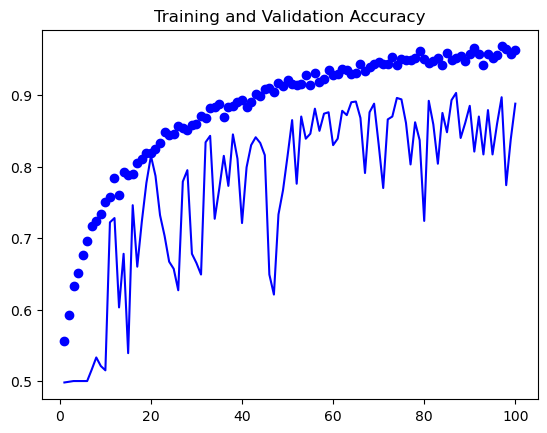

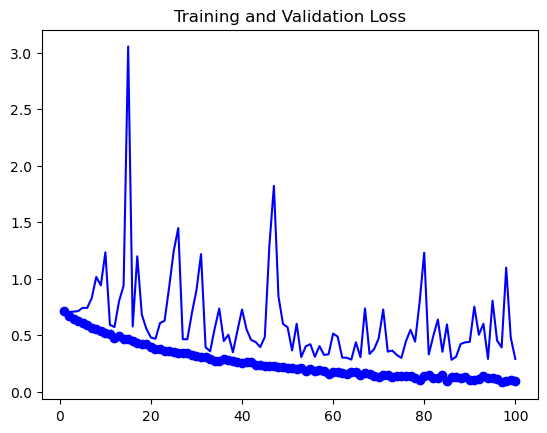

In [81]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.show()

# 解释卷积神经网络学到的内容

构建计算机视觉应用时的一个基本问题就是**可解释性**：**为什么**分类器认为某张图像中包含冰箱，而你看到的却是卡车？<p>

一般认为，深度学习模型是**“黑盒子”**，模型学打破的表示很难用人类可以理解的方式来提取和呈现。 但**卷积神经网络**有所不同，卷积神经网络模型的表示非常适合可视化，很大程度上是因为本身就是**视觉感念的表示**。<p>

可视化和解释的3种最容易理解也最有用的方法：
- **可视化卷积神经网络的中间输出（中间激活值）：** 这有助于理解卷积神经网络的层如何对输入进行变化，也有助于初步了解卷积神经网络单个滤波器的作用。
- **可视化卷积神经网络的滤波器：** 这有助于准确理解卷积神经网络中每个滤波器影响应的视觉模型或视觉概念。
- **可视化图像中的类激活热力图：** 这有助于理解图像中哪些部分被识别为属于某个类别，从而定位图像中的物体。

## 中间激活值的可视化

In [3]:
from tensorflow import keras

model = keras.models.load_model("./convnet_from_scratch_with_augmentation.keras")
model.summary()

2024-09-29 17:21:34.071578: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-09-29 17:21:34.071605: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-29 17:21:34.071612: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-29 17:21:34.071830: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-29 17:21:34.071844: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,982,084 (7.56 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 991,043 (3.78 MB)

### 预处理单张图像

In [5]:
from tensorflow import keras
import numpy as np

# 下载一张测试图像
img_path = keras.utils.get_file(
    fname='cat.jpg',
    origin='https://img-datasets.s3.amazonaws.com/cat.jpg'
)

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(
        img_path,
        target_size=target_size
    )
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_tensor = get_img_array(img_path, target_size=(180, 180))

### 显示测试图像

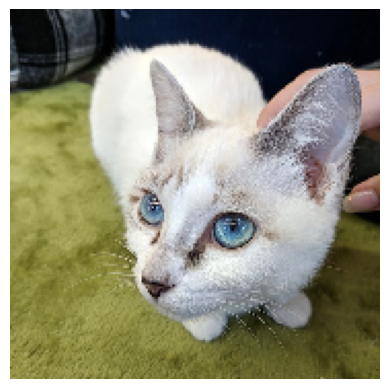

In [7]:
import matplotlib.pyplot as plt

plt.axis('off')
plt.imshow(img_tensor[0].astype('uint8'))
plt.show()

### 查看特征图

#### 实例化一个返回各层激活值的模型

In [9]:
from tensorflow.keras import layers

layer_outputs = []
layer_names = []

for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

#### 利用模型计算层的激活值

In [11]:
activations = activation_model.predict(img_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


2024-09-29 17:21:47.035429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [13]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 178, 178, 32)


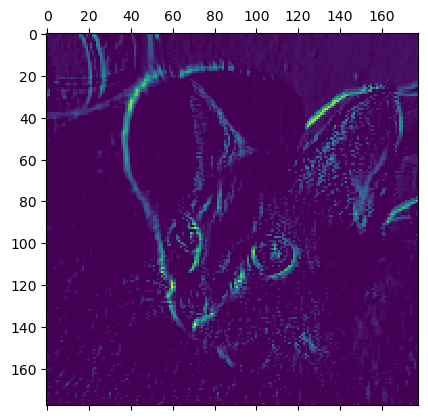

In [15]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')

### 将每个中间激活值的每个通道可视化

AttributeError: AxesImage.set() got an unexpected keyword argument 'camp'

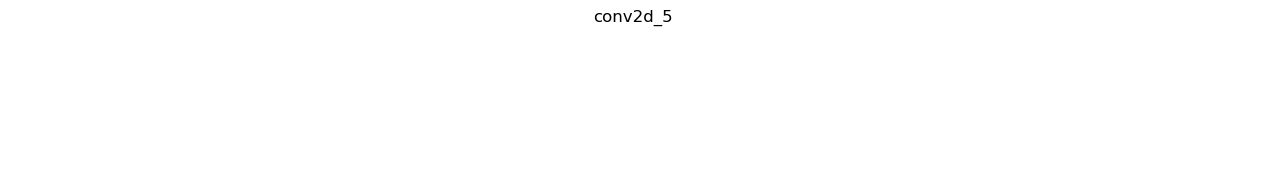

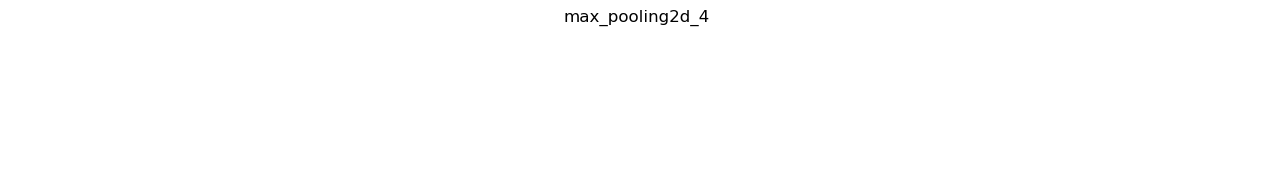

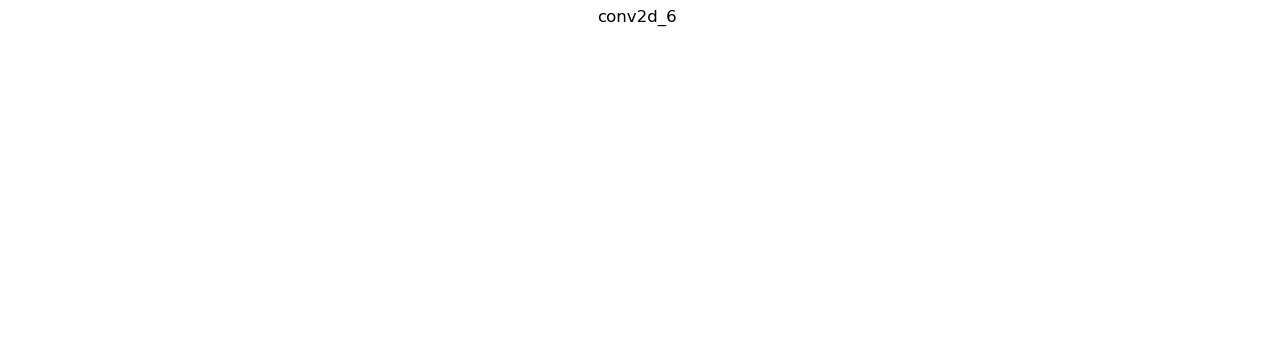

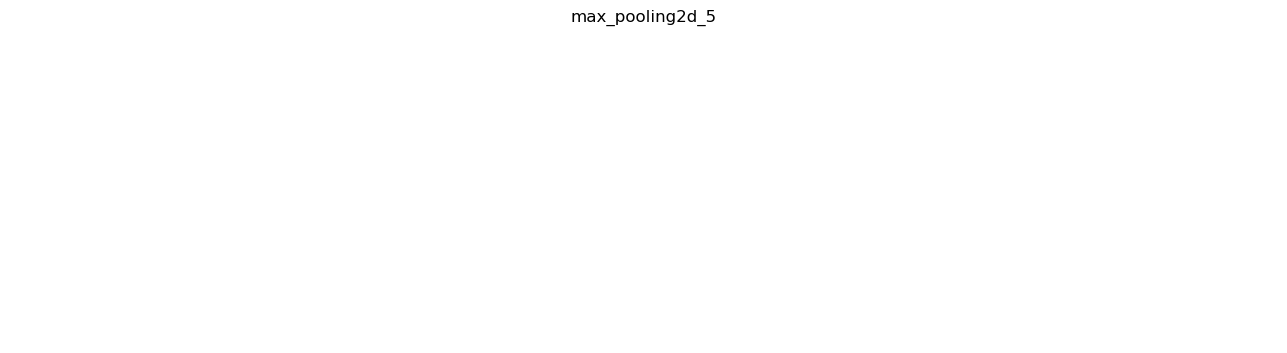

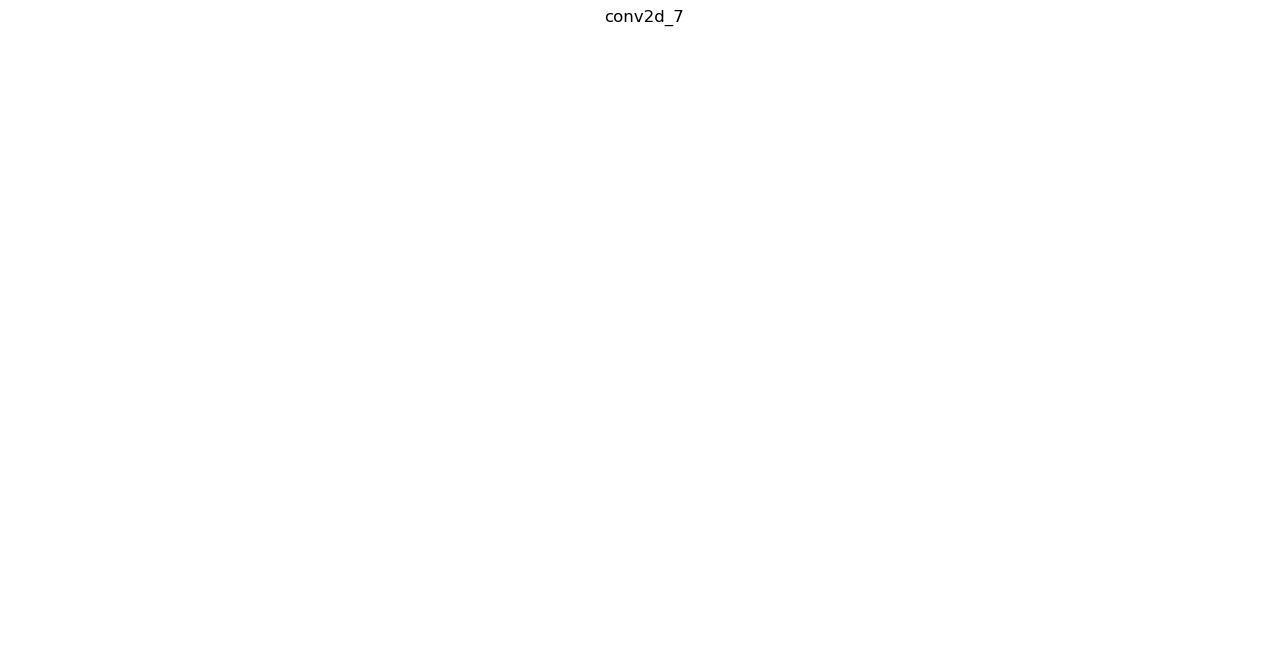

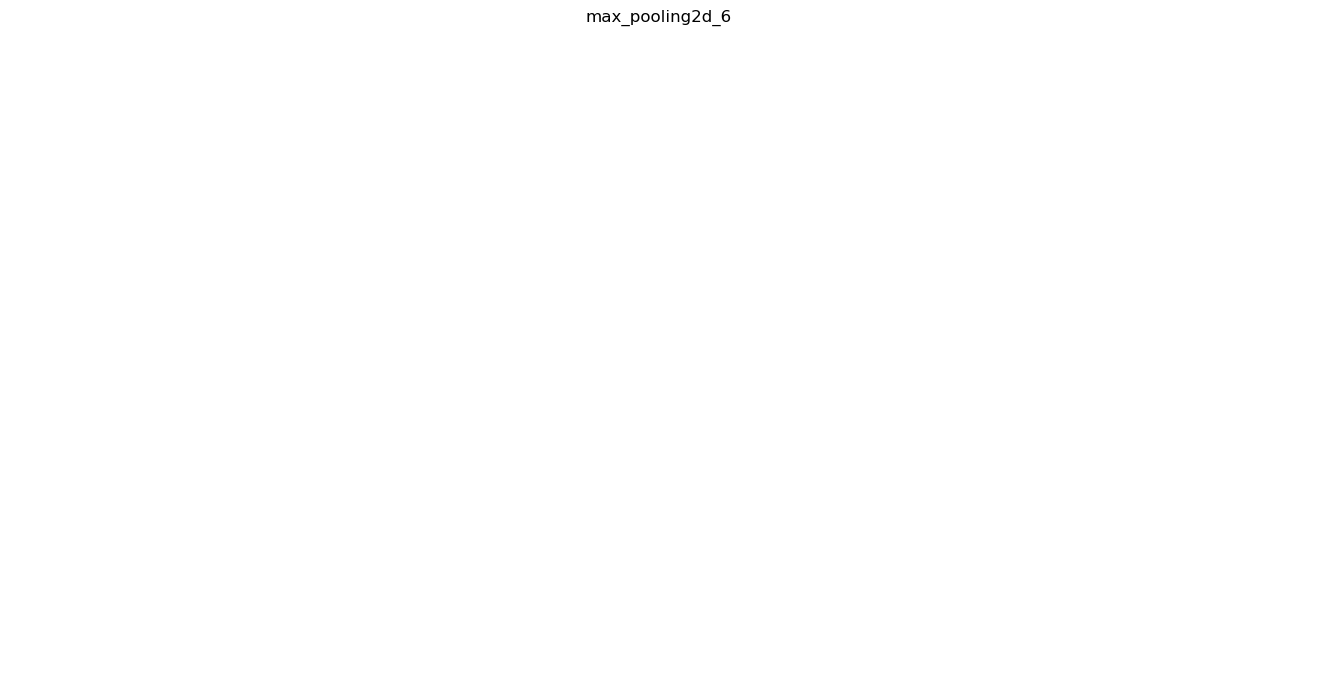

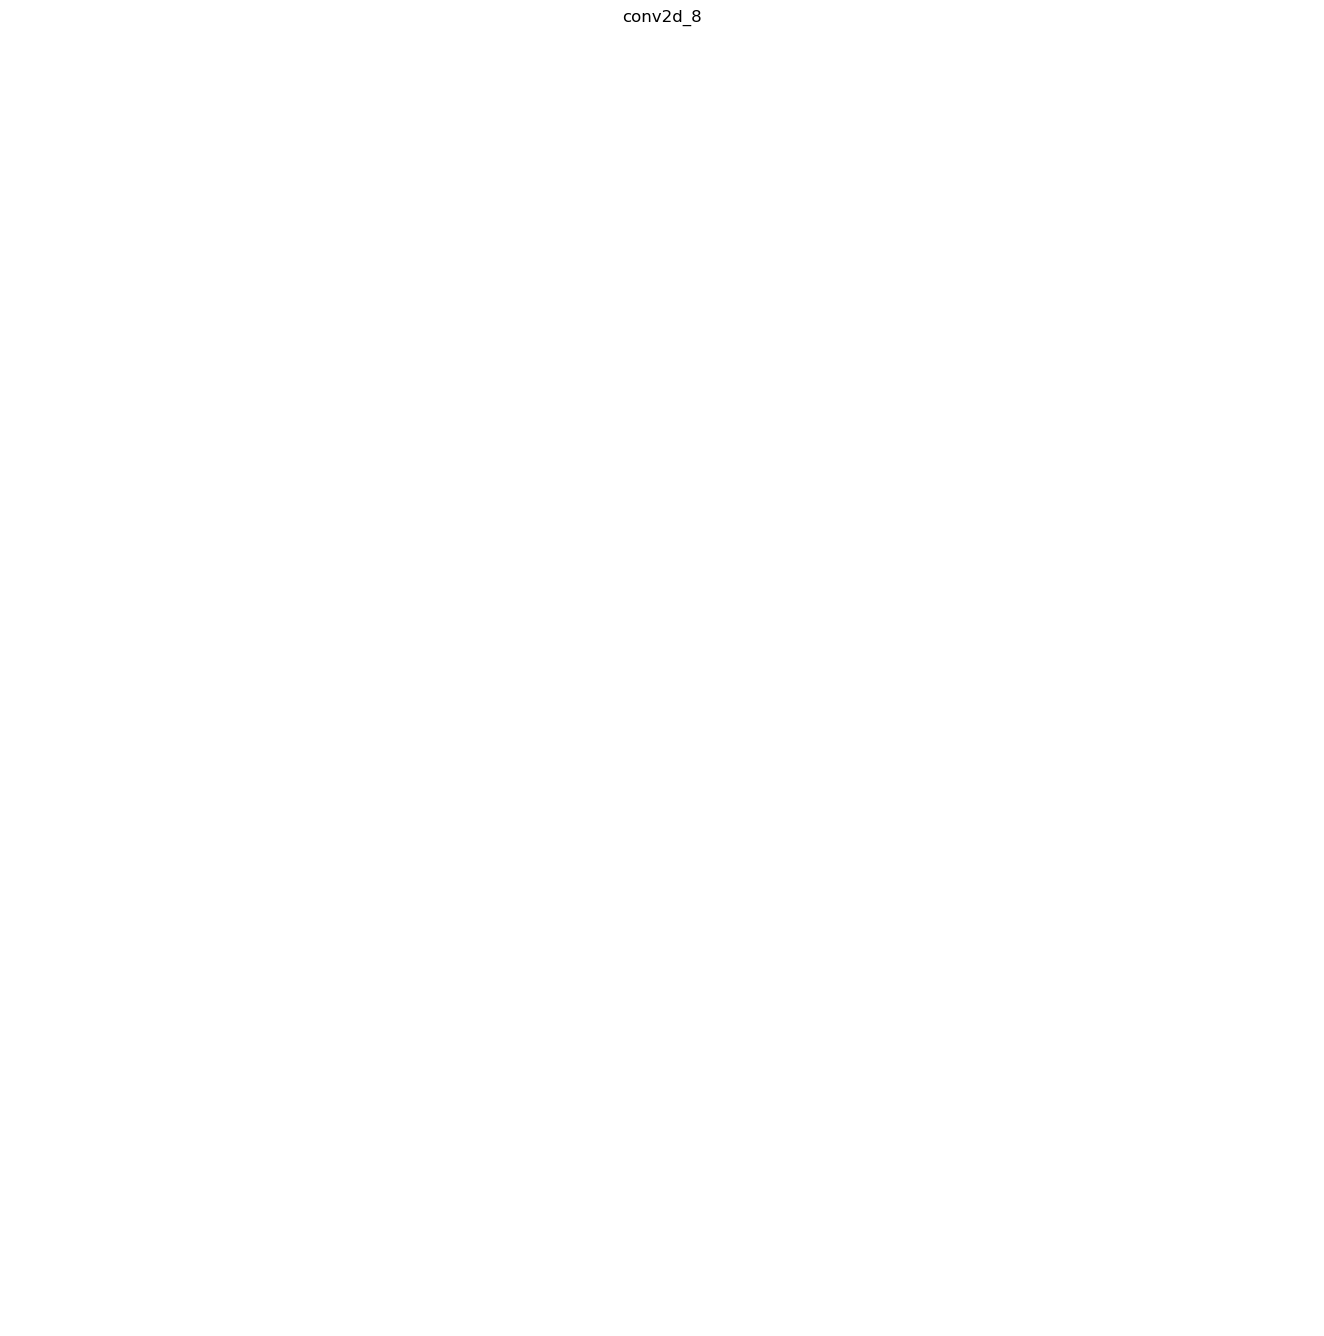

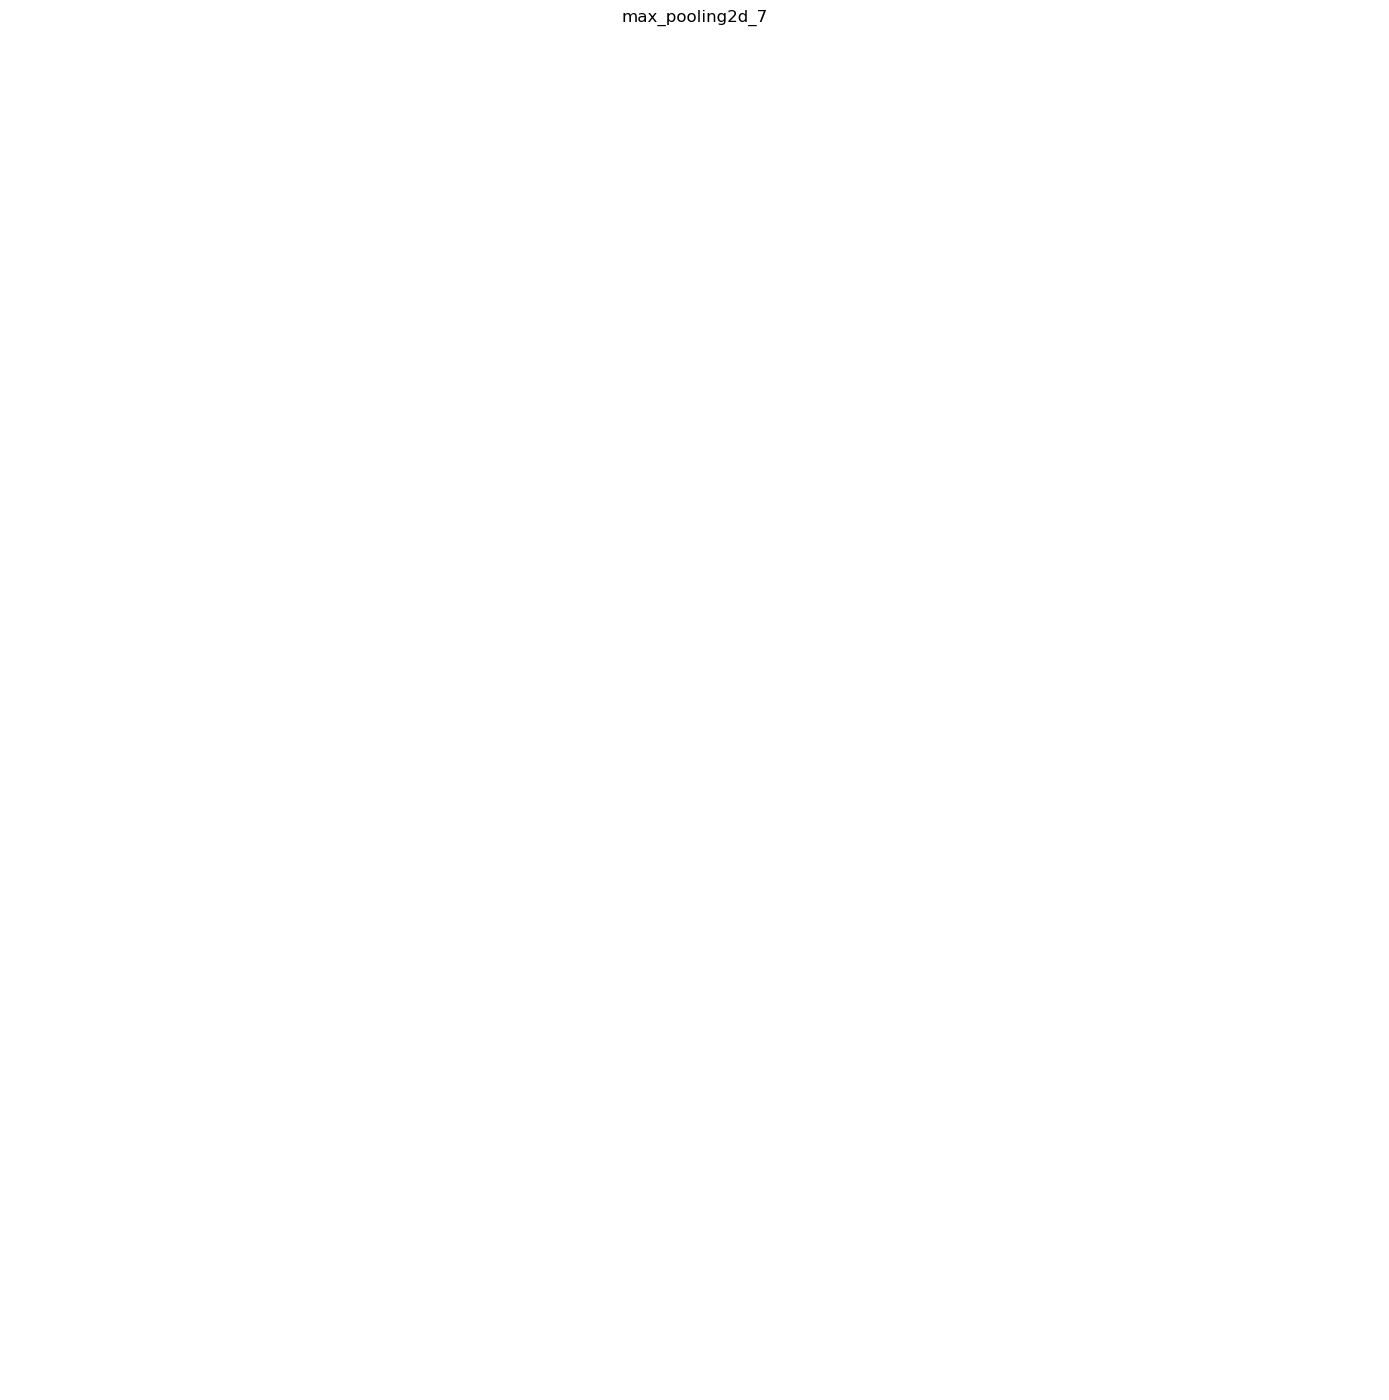

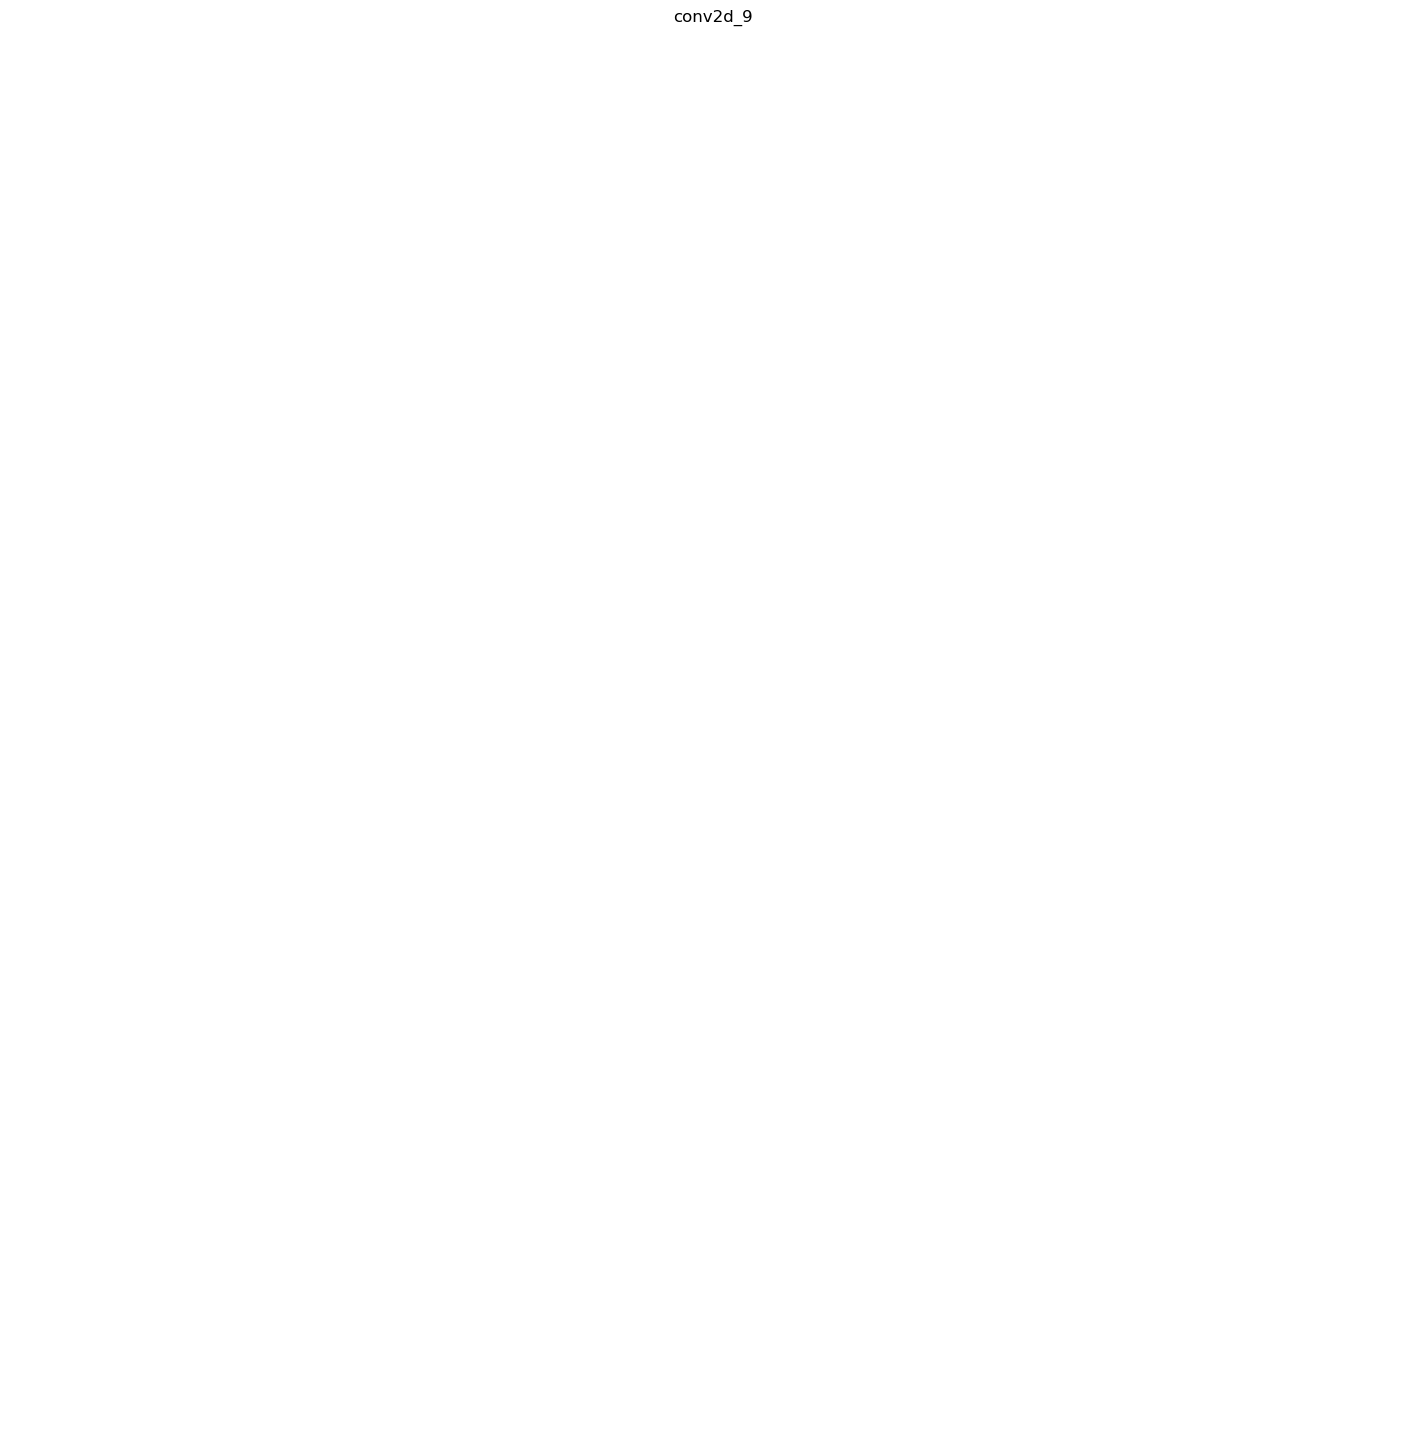

In [17]:
images_per_row = 16

# 对所有激活层进行迭代
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1, images_per_row * (size + 1) - 1))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            # 单个通道(或特征)
            channel_image = layer_activation[0, :, :, channel_index].copy()
            if channel_image.sum() != 0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[
                col * (size + 1): (col + 1) * size + col,
                row * (size + 1): (row + 1) * size + row
            ] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
plt.imshow(display_grid, aspect='auto', camp='viridis')